<a href="https://colab.research.google.com/github/WilhelmZhou/CSC3160/blob/main/%E5%91%A8%E7%82%9C_120090108_ASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/AIR6063)

This is an instruction and template for the first assignment. In this assignment, you will learn how to use tools to extract speech representations.

Should you have any inquiries, please feel free to reach out to the teaching team.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [ ]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


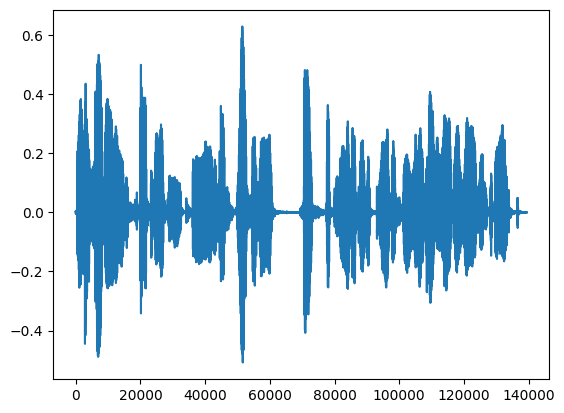

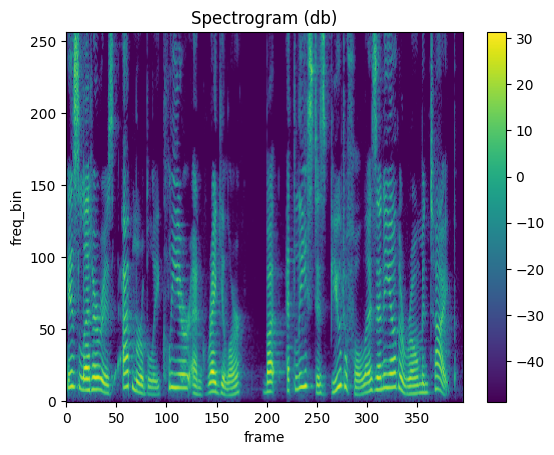

In [1]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# create an object that extract power spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [20 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024)
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



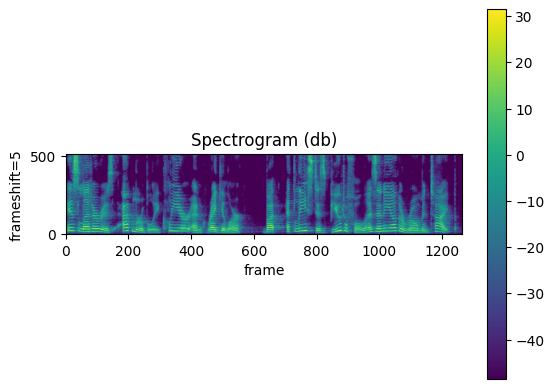

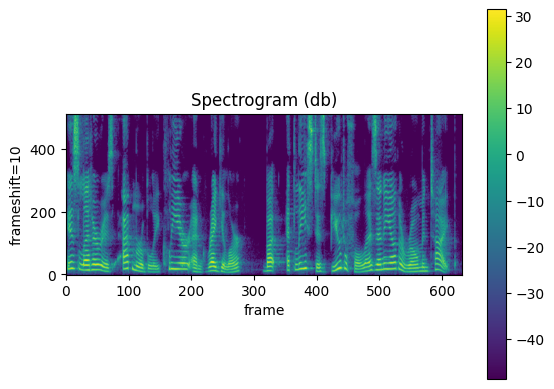

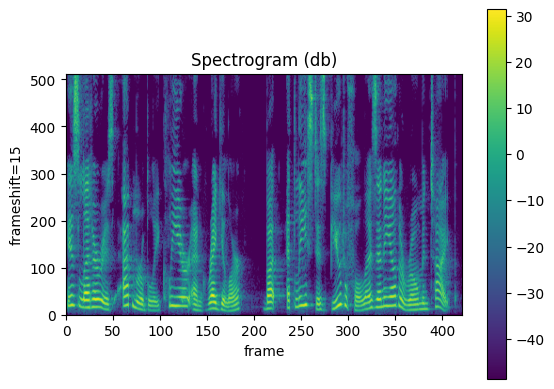

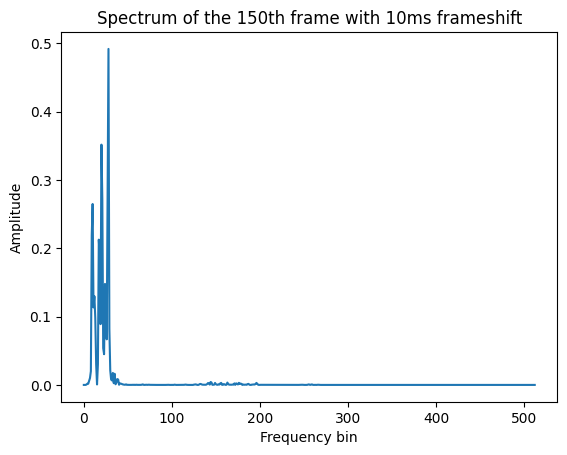

In [2]:
# Set the parameters
target_sample_rate = 16000
n_fft = 1024
window_size = 30
frameshifts = [5,10,15]

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect=0.5)
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# extract spectrogram for different frameshifts
for frameshift in frameshifts:
    spectrogram = T.Spectrogram(n_fft=n_fft, hop_length=int(frameshift/1000*target_sample_rate), win_length=int(window_size/1000*target_sample_rate))
    spec = spectrogram(resampled_waveform)
    plot_spectrogram(spec[0], ylabel=f"frameshift={frameshift}")


# Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift
spec_trans_10ms = T.Spectrogram(n_fft=n_fft, hop_length=int((10 / 1000) * target_sample_rate), power=2)
spec_10ms = spec_trans_10ms(resampled_waveform)

# Choose the 150th frame
selected_frame = spec_10ms[0][:, 150]

# Plot the spectrum
plt.figure()
plt.plot(selected_frame.t().numpy())
plt.title("Spectrum of the 150th frame with 10ms frameshift")
plt.xlabel("Frequency bin")
plt.ylabel("Amplitude")
plt.show()

## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

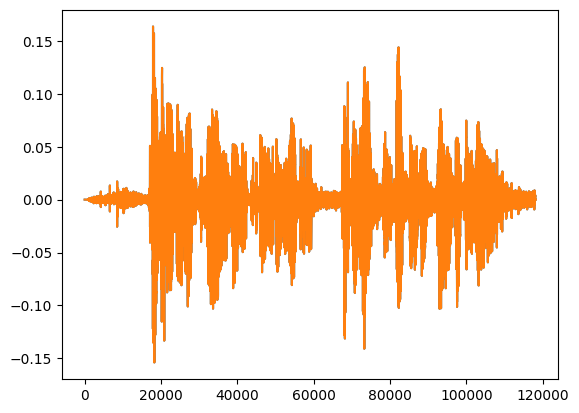

In [3]:
import torch
target_sample_rate = 16000

#file directory of my own recording
filename = 'recording.wav'

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)
# create an object that resamples a waveform with 16k Hz frequency and 16-bit depth
resampler = T.Resample(sample_rate, target_sample_rate, dtype=torch.int16)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)


#see the spectrum of the resampled waveform of my recording
plt.plot(resampled_waveform.t().numpy())

## (3) [20 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html).

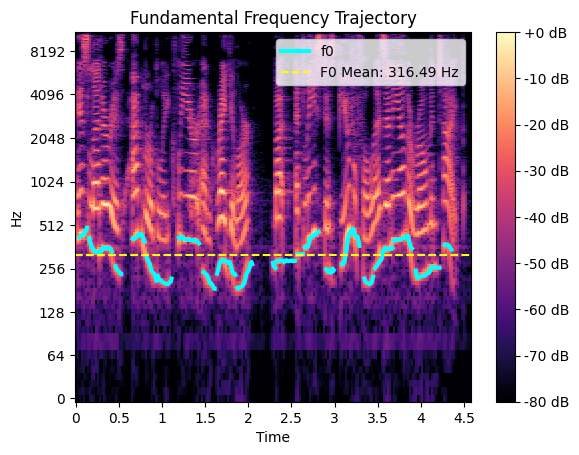

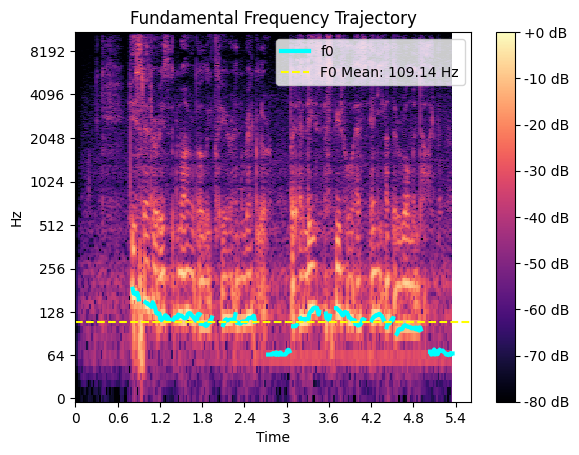

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters
hop_length = 160
sample_rate = 16000

# Load the samples with 16kHZ sample rate
audio_path1 = 'LJ001-0048.wav'
audio_path2 = 'recording.wav'
y1 , sr1 = librosa.load(audio_path1, sr=16000)
y2 , sr2 = librosa.load(audio_path2, sr=16000)
ys = [ y1 , y2 ]


for y in ys:
  # Extract F0 using librosa
  f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), hop_length=hop_length)

  # Calculate F0 Mean
  f0_mean = np.mean(f0[voiced_flag])

  times = librosa.times_like(f0, hop_length=160)
  D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

  # Plot spectrogram
  fig, ax = plt.subplots()
  img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
  ax.set(title='Fundamental Frequency Trajectory')
  fig.colorbar(img, ax=ax, format="%+2.f dB")

  # Plot F0
  ax.plot(times, f0, label='f0', color='cyan', linewidth=3)

  # Plot mean_f0
  ax.axhline(f0_mean, color='yellow', linestyle='--', label=f'F0 Mean: {f0_mean:.2f} Hz')

  ax.legend(loc='upper right')
  plt.show()


## (4) [30 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using the power spectrogram.

Here are your tasks:
* Visualize the aligned power spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [ ]:
pip install fastdtw

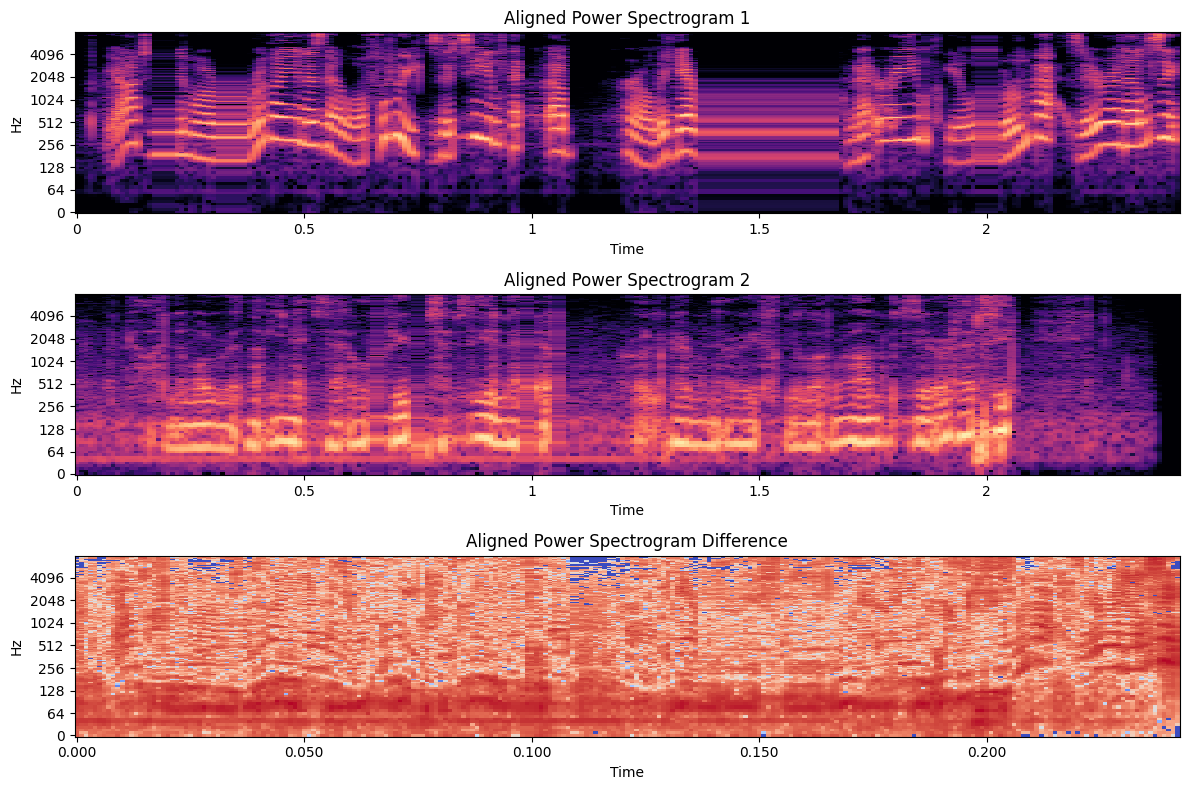

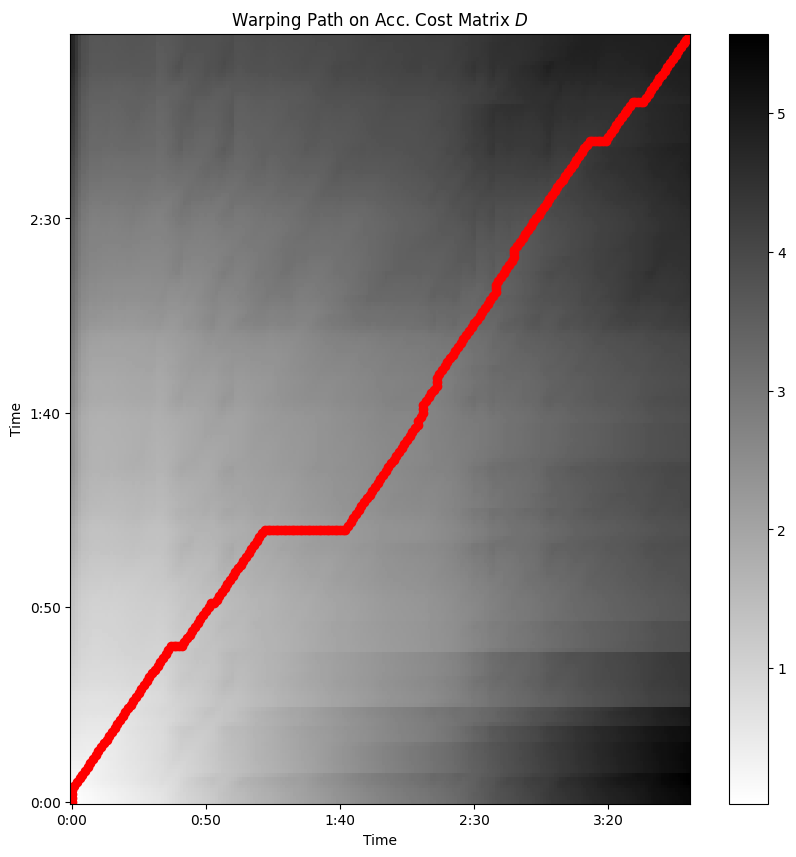

In [104]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# Set the parameters
target_sr=16000
hop_lengenth = 160

# Load the samples
audio_path1 = 'LJ001-0048.wav'
audio_path2 = 'recording.wav'
y1, sr1 = librosa.load(audio_path1)
y2, sr2 = librosa.load(audio_path2)


# Resample the audios to ths same sample rate
audio1_resampled = librosa.resample(y1,orig_sr = sr1, target_sr = target_sr)
audio2_resampled = librosa.resample(y2,orig_sr = sr2, target_sr = target_sr)

# Extract the power spectrogram
power_spectrogram1 = librosa.power_to_db(np.abs(librosa.stft(audio1_resampled))**2, ref=np.max)
power_spectrogram2 = librosa.power_to_db(np.abs(librosa.stft(audio2_resampled))**2, ref=np.max)

# Call the DTW algorithms
D, path = librosa.sequence.dtw(X=power_spectrogram1, Y=power_spectrogram2, metric='cosine')
path_array = np.array(path)

# Get the aligned power spectrograms
aligned_power_spectrogram1 = power_spectrogram1[:, path_array[:,0]]
aligned_power_spectrogram2 = power_spectrogram2[:, path_array[:,1]]

# Vilualize the aligned power spectrograms and the difference between them
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(aligned_power_spectrogram1, sr=target_sr, hop_length=hop_lengenth, y_axis='log', x_axis='time')
plt.title('Aligned Power Spectrogram 1')

plt.subplot(3, 1, 2)
librosa.display.specshow(aligned_power_spectrogram2, sr=target_sr, hop_length=hop_lengenth, y_axis='log', x_axis='time')
plt.title('Aligned Power Spectrogram 2')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(aligned_power_spectrogram1 - aligned_power_spectrogram2)), sr=target_sr, hop_length=hop_length, y_axis='log', x_axis='time')
plt.title('Aligned Power Spectrogram Difference')

plt.tight_layout()
plt.show()

# Visualize the wraped path
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_length)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(path_array[:, 1], path_array[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()

## (5) [20 marks] Applications

Please write 5 application usecases that the speech technology can potentially help with, and give your reasons.

For example
- Speech disorder: a speech-to-speech conversion model that can convert disordered speech to normal speech.


**Note: Maximum 500 words.**

```
-Virtual Agents:: A speech model that can perform tasks such as setting reminders, answering questions, and controlling smart home devices.


-Speech-to-Text Transcription: A model that can transcribe spoken language into written text.


-Language Learning: An application that provides real-time feedback on pronunciation and language skills to help analyze and evaluate users' spoken language.


-Medical Dictation and Transcription: A model that dictates clinical notes, transcribing patient records using voice commands.


-Voice Biometrics for Authentication: A authentication process that identifies or verifies individuals based on their unique vocal characteristics.

